```
Author: Yagnik Poshiya, Parth Goswami
GitHub: @yagnikposhiya, @divinecodes
Charotar University of Science and Technology
Changa-388421, Anand, Gujarat, India.
```

In [1]:
import tensorflow
tensorflow.__version__

2023-03-31 15:58:07.238546: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 15:58:07.637840: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 15:58:07.702497: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-31 15:58:07.702517: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

'2.11.0'

In [2]:
# libraries importing
import shutil
import nilearn as nl
import nilearn.plotting as nlplt
import numpy as np 
import nibabel as nib
import matplotlib.pyplot as plt
import skimage
from skimage.util import montage
from skimage.transform import rotate
from nibabel.viewers import OrthoSlicer3D as av
import gif_your_nifti.core as gif2nif


In [3]:
nifti_data = nib.load('BraTS20_Training_001_t1.nii').get_fdata()

In [4]:
print(type(nifti_data))
print(nifti_data.shape)
print(nifti_data.shape[0]//2)
print(nifti_data.ndim)

<class 'numpy.memmap'>
(240, 240, 155)
120
3


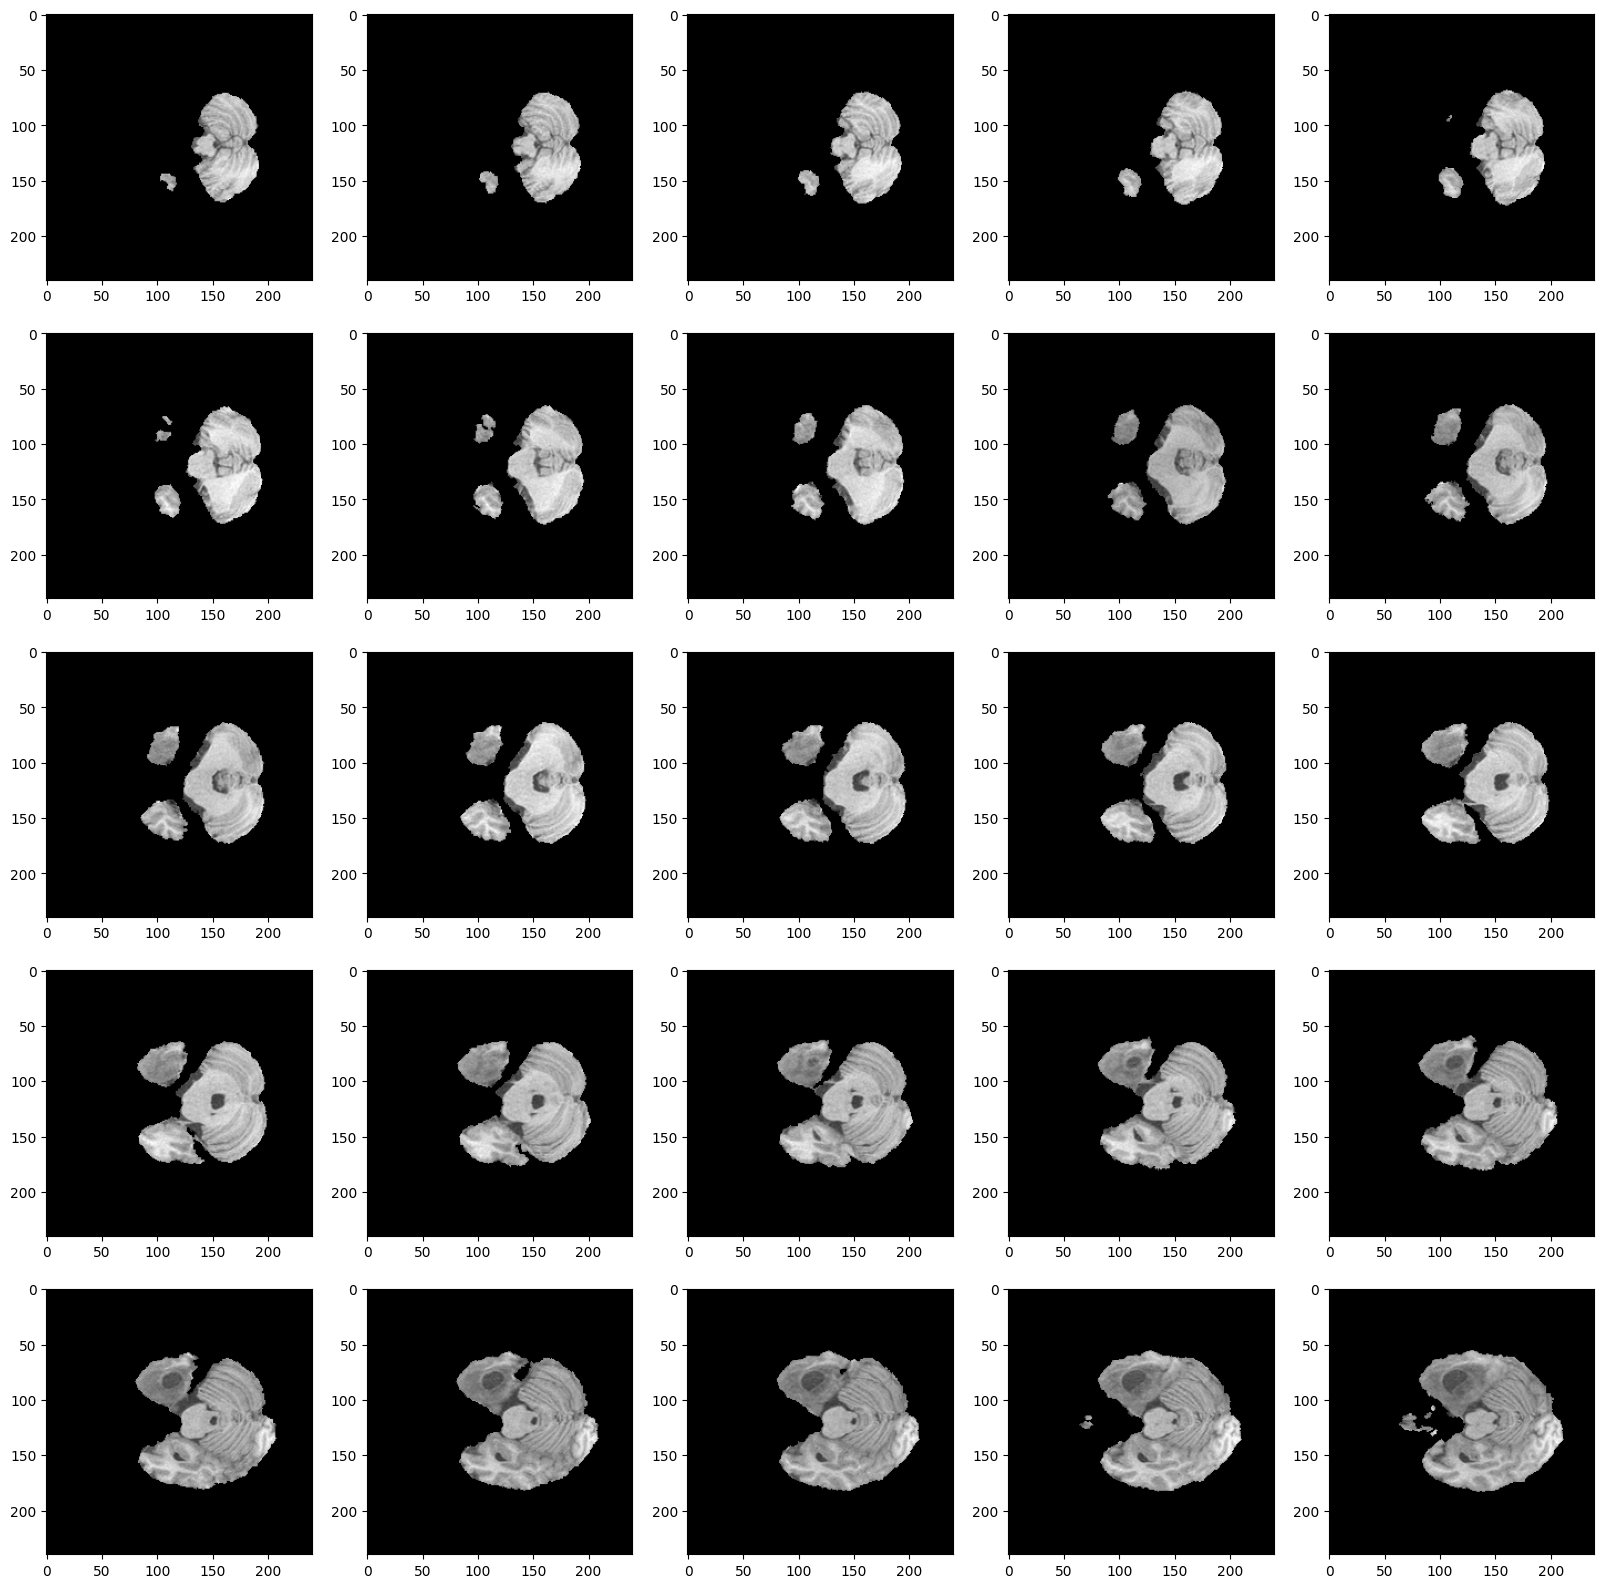

In [5]:
fig, ax = plt.subplots(5,5, figsize=(20,20))
i = 25
for index_one in range(0,5):
    for index_two in range(0,5):
        ax[index_one][index_two].imshow(nifti_data[:,:,i],cmap='gray')
        i = i + 1

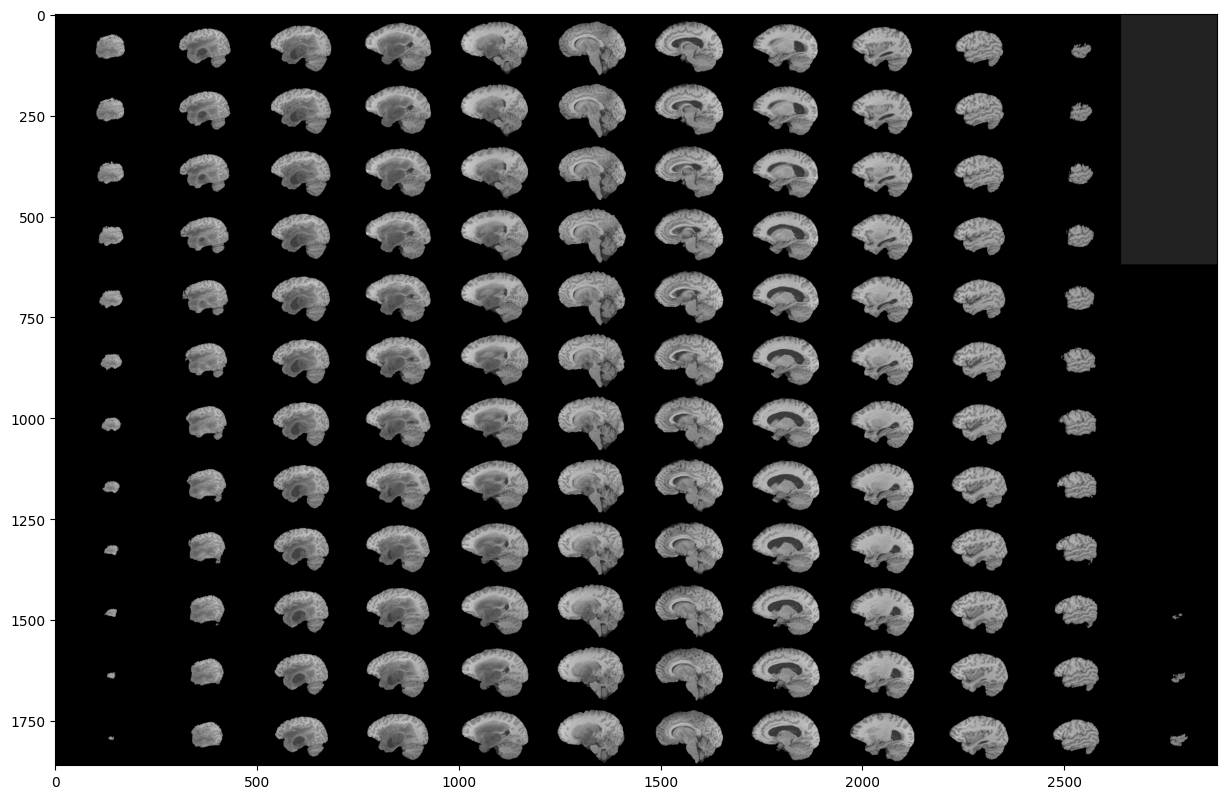

In [4]:
# Skip 50:-50 slices since there is not much to see
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(nifti_data[50:-50,:,:]), 90, resize=True), cmap ='gray')

In [14]:
shutil.copy2('BraTS20_Training_001_flair.nii', 'test_gif_BraTS20_Training_001_flair.nii')
gif2nif.write_gif_normal('test_gif_BraTS20_Training_001_flair.nii')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

In [15]:
segmentation_data = nib.load('BraTS20_Training_001_seg.nii').get_fdata()

In [19]:
print(type(segmentation_data))
print(segmentation_data.shape)
print(segmentation_data.ndim)

<class 'numpy.memmap'>
(240, 240, 155)
3


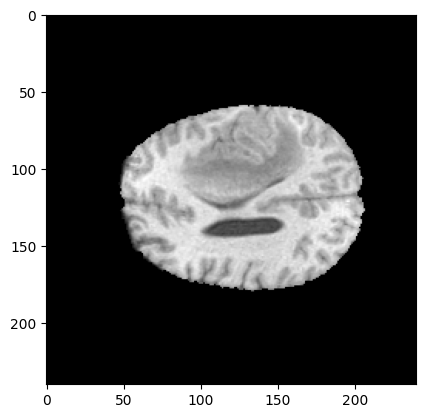

In [8]:
plt.imshow(nifti_data[:,:,95],cmap='gray')

In [26]:
shutil.copy2('BraTS20_Training_001_seg.nii','test_gif_BraTS20_Training_001_seg.nii')
gif2nif.write_gif_normal('test_gif_BraTS20_Training_001_seg.nii')

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

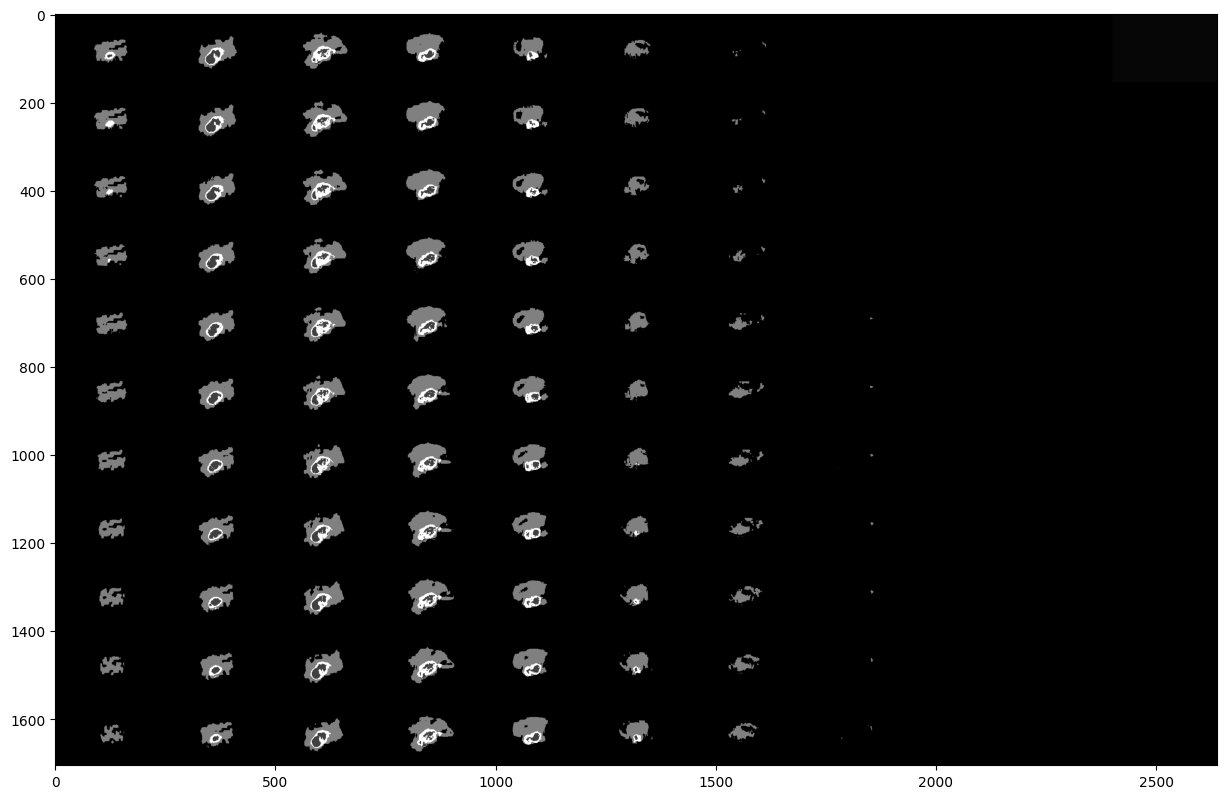

In [25]:
fig, ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(rotate(montage(segmentation_data[60:-60,:,:]), 90, resize=True), cmap='gray')


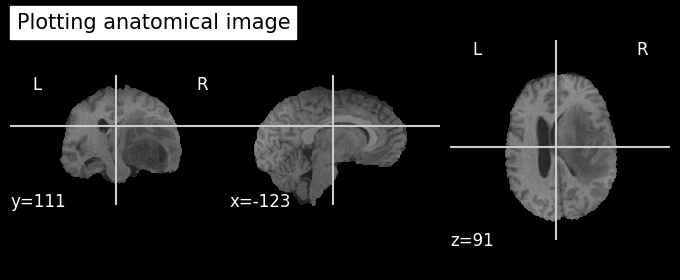

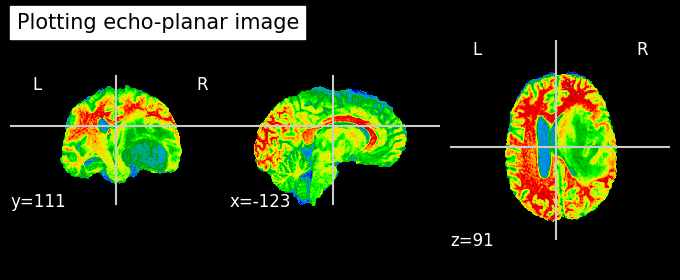

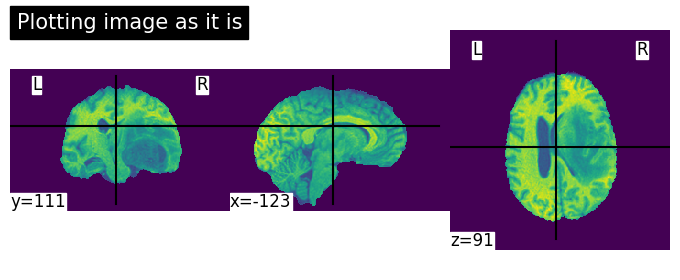

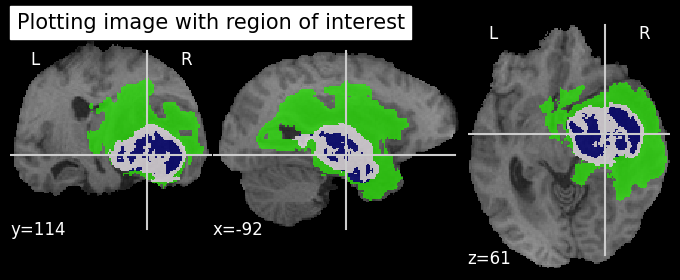

In [37]:
niimage = nl.image.load_img('BraTS20_Training_001_t1.nii')
nimask = nl.image.load_img('BraTS20_Training_001_seg.nii')

nlplt.plot_anat(niimage, title='Plotting anatomical image')
nlplt.plot_epi(niimage, title='Plotting echo-planar image')
nlplt.plot_img(niimage, title='Plotting image as it is')
nlplt.plot_roi(nimask, bg_img=niimage, title='Plotting image with region of interest')

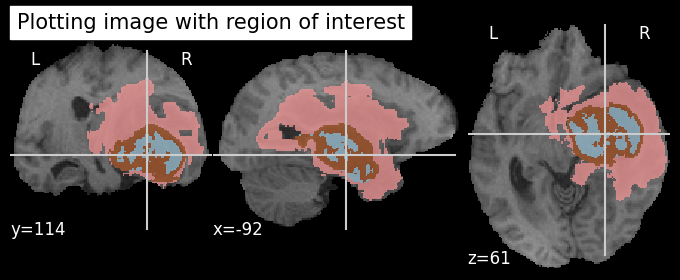

In [38]:
nlplt.plot_roi(nimask, bg_img=niimage, title='Plotting image with region of interest', cmap='Paired')

In [2]:
import tensorflow
from tensorflow import keras
import numpy as np
import keras.backend as K

arr = np.arange(25,dtype='float').reshape(5,5)
arr[3][3] = 0.5
arr[3][4] = 0.78
arr[3][2] = 0.2345
print(arr, '\n')

narr = K.clip(arr,0,1)
print(narr)

[[ 0.      1.      2.      3.      4.    ]
 [ 5.      6.      7.      8.      9.    ]
 [10.     11.     12.     13.     14.    ]
 [15.     16.      0.2345  0.5     0.78  ]
 [20.     21.     22.     23.     24.    ]] 

tf.Tensor(
[[0.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     1.     1.     1.    ]
 [1.     1.     0.2345 0.5    0.78  ]
 [1.     1.     1.     1.     1.    ]], shape=(5, 5), dtype=float64)


2023-01-29 17:00:48.479536: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-01-29 17:00:48.479624: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (deeplearning): /proc/driver/nvidia/version does not exist
2023-01-29 17:00:48.483605: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
import os
path = '/home/yagnikposhiya/'
train_and_val_directories = [f.path for f in os.scandir(path) if f.is_dir()] 
print(train_and_val_directories)
print(len(train_and_val_directories))

def function(dirList):
    x = []
    for i in range(0, len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

outcome = function(train_and_val_directories)
print(outcome)
print(len(outcome))

['/home/yagnikposhiya/.jupyter', '/home/yagnikposhiya/.var', '/home/yagnikposhiya/.local', '/home/yagnikposhiya/Videos', '/home/yagnikposhiya/.keras', '/home/yagnikposhiya/.cache', '/home/yagnikposhiya/.config', '/home/yagnikposhiya/.mozilla', '/home/yagnikposhiya/Music', '/home/yagnikposhiya/.ipython', '/home/yagnikposhiya/Templates', '/home/yagnikposhiya/.anaconda_backup', '/home/yagnikposhiya/Desktop', '/home/yagnikposhiya/.pki', '/home/yagnikposhiya/.themes', '/home/yagnikposhiya/WorkStation', '/home/yagnikposhiya/.gnupg', '/home/yagnikposhiya/Public', '/home/yagnikposhiya/Documents', '/home/yagnikposhiya/Downloads', '/home/yagnikposhiya/.kaggle', '/home/yagnikposhiya/.gphoto', '/home/yagnikposhiya/.streamlit', '/home/yagnikposhiya/.vscode', '/home/yagnikposhiya/.atom', '/home/yagnikposhiya/Pictures', '/home/yagnikposhiya/.ssh']
27
['.jupyter', '.var', '.local', 'Videos', '.keras', '.cache', '.config', '.mozilla', 'Music', '.ipython', 'Templates', '.anaconda_backup', 'Desktop', '.p

In [35]:
word = 'geeks for geeks'
y = []
# Returns highest index of the substring
result = word.rfind('geeks') + 1
print ("Substring 'geeks' found at index :", result )
y.append(word[result:])
print(y)


Substring 'geeks' found at index : 11
['eeks']


In [39]:
class Student:

    university_name = 'Charotar University of Science and Technology'
    return_dict = {'type':'int', 'units':'in the form of string', 'docstring':'return the instance value of variable mobile_number'}

    def __init__(self, fname:str, mname:str, lname:str, student_id:str) -> None:
        self.fname = fname
        self.mname = mname
        self.lname = lname
        self.student_id = student_id
    
    def __str__(self) -> str:
        return "This is object/instance of \"Stduent\" class"
    
    def setMobileNumber(self, mobile_number) -> None:
        self.mobile_number = mobile_number

    def getMobileNumber(self) -> return_dict:
        return self.mobile_number


student_one = Student('Yagnik','Maheshbhai','Poshiya','20ce114')
student_one.setMobileNumber(9023518477)
m_number = student_one.getMobileNumber()
print(m_number)
print(student_one.fname)
print(student_one.mname)
print(student_one.lname)
print(student_one.student_id)
print(student_one.university_name)
print(student_one.getMobileNumber.__annotations__['return'])
print(student_one)



9023518477
Yagnik
Maheshbhai
Poshiya
20ce114
Charotar University of Science and Technology
{'type': 'int', 'units': 'in the form of string', 'docstring': 'return the instance value of variable mobile_number'}
This is object/instance of "Stduent" class


In [31]:
a = 1_00_000
print(a)
print(type(a))

100000
<class 'int'>
